In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import string
import re#re stands for regular expression and this package is use for pattern matching

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df=pd.read_csv("spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
df=df[['v1','v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df.columns=['label','text']

In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


<Axes: xlabel='label', ylabel='count'>

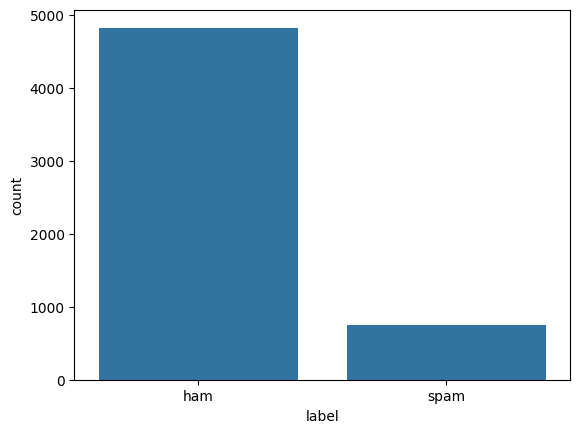

In [ ]:
sns.countplot(x='label',data=df)

In [ ]:
ps=PorterStemmer()

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
def clean_text(text):
  text=text.lower()#converted text to lower case
  text=re.sub(r'[^\w\s]',"",text)#remove punctuation
  words=text.split()#tokenizing thw words
  words=[ps.stem(word) for word in words if word not in stop_words]#removing stopwords and stemming
  return ''.join(words)#stmmed words gets converted to string

In [ ]:
df['cleaned_text']=df['text'].apply(clean_text)

<ipython-input-40-0c4e7e499617>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text']=df['text'].apply(clean_text)


In [ ]:
df

,label,text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",gojurongpointcraziavailbugingreatworldlaebuffe...
1,ham,Ok lar... Joking wif u oni...,oklarjokewifuoni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,freeentri2wklicompwinfacupfinaltkt21stmay2005t...
3,ham,U dun say so early hor... U c already then say...,udunsayearlihorucalreadisay
4,ham,"Nah I don't think he goes to usf, he lives aro...",nahdontthinkgoeusflivearoundthough
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2ndtimetri2contactuuå750poundprize2claimeasica...
5568,ham,Will Ì_ b going to esplanade fr home?,ì_bgoesplanadfrhome
5569,ham,"Pity, * was in mood for that. So...any other s...",pitimoodsoanisuggest
5570,ham,The guy did some bitching but I acted like i'd...,guybitchactlikeidinterestbuysomethelsnextweekg...


In [ ]:
#feature extraction
tfidf=TfidfVectorizer(max_features=5000)
X=tfidf.fit_transform(df['cleaned_text']).toarray()

In [ ]:
y=df['label'].map({'ham':0,'spam':1})

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y

,label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred)

0.8654708520179372

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[965,   0],
       [150,   0]])

<Axes: >

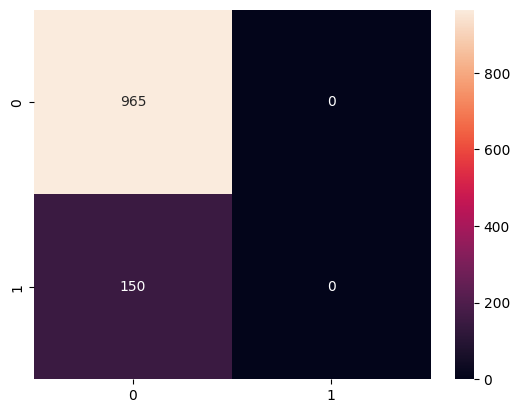

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
